# Introduction du projet Footbal match predictor

Pour ce projet, nous avons comme devoir de prédire des résultats de matchs de football à venir (ou passés ) sur base des performances passées des équipes, et de leurs joueurs. 

Pour ce faire, on dispose d’une immense base de données de résultats de matches collectés durant 8 ans. Elle contient plus de 25000  matches et plus de 10000 joueurs.

Il est de notre devoir de fetcher,nettoyer, préparer les données mais aussi d'entrainer un modèle et d'évaluer ce modèle.



# Data Fetching

La première étape du projet est de **FETCHER** les données. 

Dans un premier temps, nous allons récupérer les données se trouvant sur Kaggle. La base de données est une base de donnée .sqlite . Nous avons utilisé un script permettant d'extraire les différentes tables de cette base de données sous forme CSV.

La deuxième étape étant d'observer les différentes features et d'extraire les corrélations des features entre elles.

### Nous récuperons les données à partir du fichier sqlite et on créeons un fichier csv distincts pour chaque table présente dans la base de donnéees

In [1]:
#IMPORTS
import sqlite3
import pandas as pd
#Enlever les warnings
import warnings
warnings.simplefilter("ignore")

#DATA FETCHING
dat = sqlite3.connect('../database/database.sqlite')

table = ["Country", "League", "X_Train", "X_Test","Player", "Player_Attributes",
         "Team", "Team_Attributes"]

csv = {}

for name in table:
    query = dat.execute("SELECT * From " + name)
    cols = [column[0] for column in query.description]
    results = pd.DataFrame.from_records(data=query.fetchall(), columns=cols)
    results.to_csv(r'../csv/'+name+'.csv')


### Transformation des fichiers csv en dataframes

In [2]:
matchsTrain = pd.read_csv('../csv/X_Train.csv')
matchsTest = pd.read_csv('../csv/X_Test.csv')
players = pd.read_csv('../csv/Player.csv')
teams = pd.read_csv('../csv/Team.csv')
team_attr = pd.read_csv('../csv/Team_Attributes.csv')
player_attr = pd.read_csv('../csv/Player_Attributes.csv')
countries = pd.read_csv('../csv/Country.csv')
leagues = pd.read_csv('../csv/League.csv')

## Exploration des données

#### Exploration du train set

Informations importantes à propos du training set: 
- les colonnes home/away_player_XY représentent les coordonnées des X,Y des joueurs sur le terrain
- les colonnes home/away_player_i où 1<i<11 représentent l'api id des joueurs

Informations sur les colonnes du dataframes comme le nombre d'éléments non null et le type de données de la colonne

In [3]:
matchsTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20479 entries, 0 to 20478
Data columns (total 79 columns):
Unnamed: 0          20479 non-null int64
index               20479 non-null int64
id                  20479 non-null int64
country_id          20479 non-null int64
league_id           20479 non-null int64
season              20479 non-null object
stage               20479 non-null int64
date                20479 non-null object
match_api_id        20479 non-null int64
home_team_api_id    20479 non-null int64
away_team_api_id    20479 non-null int64
home_team_goal      20479 non-null int64
away_team_goal      20479 non-null int64
home_player_X1      19033 non-null float64
home_player_X2      19033 non-null float64
home_player_X3      19025 non-null float64
home_player_X4      19025 non-null float64
home_player_X5      19025 non-null float64
home_player_X6      19025 non-null float64
home_player_X7      19025 non-null float64
home_player_X8      19025 non-null float64
home_player_

Ici on peut voir des descriptions statistiques sur les colonnes du dataframe

In [4]:
matchsTrain.describe()

,Unnamed: 0,index,id,country_id,league_id,stage,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,away_player_2,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11
count,20479.000000,20479.000000,20479.0000,20479.000000,20479.000000,20479.000000,2.047900e+04,20479.000000,20479.000000,20479.000000,...,19460.000000,19439.000000,19448.000000,19425.000000,19430.000000,19498.000000,19409.000000,19433.000000,19348.000000,19264.000000
mean,10239.000000,10239.000000,13018.8497,11766.815177,11766.815177,18.224132,1.196640e+06,9903.388105,10035.218272,1.538454,...,107215.875231,91067.257729,94952.167935,109937.905071,102434.662120,98161.155247,110213.809418,110629.648948,106639.449245,105447.734064
std,5911.922417,5911.922417,7492.2651,7551.399825,7551.399825,10.398607,4.950166e+05,13529.090615,14554.860615,1.296081,...,113465.530366,101884.382600,103884.329333,112726.177016,111247.146676,107130.925346,117246.374813,116002.144951,112511.966589,110469.160375
min,0.000000,0.000000,2.0000,1.000000,1.000000,1.000000,4.831290e+05,1601.000000,1601.000000,0.000000,...,2790.000000,2752.000000,2752.000000,2790.000000,2625.000000,2625.000000,2625.000000,2625.000000,2802.000000,2802.000000
25%,5119.500000,5119.500000,6540.5000,4769.000000,4769.000000,9.000000,7.684365e+05,8481.000000,8472.000000,1.000000,...,32574.000000,30464.000000,30617.000000,33579.000000,31058.000000,30930.000000,32836.000000,33421.000000,32572.000000,32748.000000
50%,10239.000000,10239.000000,13027.0000,10257.000000,10257.000000,18.000000,1.189713e+06,8697.000000,8696.000000,1.000000,...,42388.000000,39892.000000,41062.000000,46297.000000,41659.000000,41603.500000,46104.000000,45860.000000,45174.000000,43097.000000
75%,15358.500000,15358.500000,19485.5000,17642.000000,17642.000000,27.000000,1.709904e+06,9925.000000,9911.000000,2.000000,...,159854.000000,119007.000000,145561.000000,160243.000000,151079.000000,145538.000000,164031.000000,164089.000000,160194.000000,163205.000000
max,20478.000000,20478.000000,25979.0000,24558.000000,24558.000000,38.000000,2.216672e+06,274581.000000,274581.000000,10.000000,...,748432.000000,705484.000000,728414.000000,746419.000000,722766.000000,750435.000000,717248.000000,722766.000000,722766.000000,726956.000000


On peut voir ici les 5 premières lignes du dataframe pour avoir une idée générale de celui-ci

In [5]:
matchsTrain.head()

,Unnamed: 0,index,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,...,away_player_2,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11
0,0,0,11103,10257,10257,2010/2011,17,2010-12-19 00:00:00,888326,8533,...,231753.0,24235.0,41884.0,34320.0,31314.0,192574.0,27694.0,39232.0,30712.0,39540.0
1,1,1,16167,15722,15722,2009/2010,5,2009-08-29 00:00:00,673737,8245,...,13515.0,13533.0,69261.0,NaN,69599.0,NaN,NaN,NaN,NaN,NaN
2,2,2,11222,10257,10257,2010/2011,28,2011-03-06 00:00:00,888435,9882,...,150466.0,18500.0,25815.0,41380.0,39701.0,39264.0,73999.0,167634.0,39306.0,96598.0
3,3,3,11018,10257,10257,2010/2011,1,2010-08-29 00:00:00,888161,9976,...,27720.0,24235.0,41884.0,41892.0,31314.0,33888.0,41890.0,39232.0,30727.0,39540.0
4,4,4,25596,24558,24558,2013/2014,5,2013-08-10 00:00:00,1471657,9930,...,67349.0,16254.0,25815.0,25843.0,93223.0,113227.0,302079.0,30912.0,25860.0,71764.0


L'api id représente l'id sur lequel on pourra faire un "merge" du training set avec d'autres tables tels que Player Attributs, Team Attributs,...

### Conclusions : 
- En inspectant les premieres lignes du dataframe , on peut s'apercevoir que tous les matchs sont joués entre équipes d'un même championnat (pas de matchs internationaux ni championnat europeen). Nous n'allons donc pas utiliser les tables Country et League


## Injection des attributs des differentes tables dans le training set (Visualisation des correlations entre differents attributs des differentes tables)

### Ajout du label

Nous allons déterminer le label que l'on veut prédire par la suite. C'est à dire le résultat final du match (1: équipe à domicile gagne, 0 : égalité, -1 : équipe à l'extérieur gagne)

In [6]:
def det_label(score1, score2):
    if(score1 == score2):
        return 0
    if(score1 < score2):
        return -1
    else:
        return 1


In [7]:
#On va travailler sur une copie du training set
matchsTrainCopy = matchsTrain.copy()
matchsTrainCopy['label'] = matchsTrainCopy.apply(lambda row: det_label(
    row['home_team_goal'], row['away_team_goal']), axis=1)

In [8]:
#Nous supprimons les scores car ils nous plus utils
matchsTrainCopy = matchsTrainCopy.drop(['away_team_goal', 'home_team_goal'], axis=1)

Nous allons voir la dispersion de nos valeurs pour le label

In [9]:
matchsTrainCopy['label'].value_counts()

 1    9367
-1    5939
 0    5173
Name: label, dtype: int64

Nous pouvons voir que l'équipe jouant à domicile gagne dans un peu moins de 50% des cas

### Exploration des attributes des équipes

Pour mieux visualiser les attributs liés aux équipes nous allons drop les attributs liés aux joueurs

In [10]:
matchsTrainCopy.drop(matchsTrainCopy.select(lambda col: col.startswith('home_player'), axis=1), axis=1, inplace=True)
matchsTrainCopy.drop(matchsTrainCopy.select(lambda col: col.startswith('away_player'), axis=1), axis=1, inplace=True)

In [11]:
matchsTrainCopy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20479 entries, 0 to 20478
Data columns (total 12 columns):
Unnamed: 0          20479 non-null int64
index               20479 non-null int64
id                  20479 non-null int64
country_id          20479 non-null int64
league_id           20479 non-null int64
season              20479 non-null object
stage               20479 non-null int64
date                20479 non-null object
match_api_id        20479 non-null int64
home_team_api_id    20479 non-null int64
away_team_api_id    20479 non-null int64
label               20479 non-null int64
dtypes: int64(10), object(2)
memory usage: 1.9+ MB


### Merge du training set avec le team attributes pour voir quelles colonnes sont interessantes à extraire

In [12]:
mergedDf = matchsTrainCopy.merge(team_attr, left_on='home_team_api_id', right_on='team_api_id')
#On va regarder la correlation des differents colonnes avec la colonne label 
correlation = mergedDf.corrwith(mergedDf['label']).sort_values(ascending=False)[1:] 
# [1:] pour ne pas prendre le label en compte car la correlation avec lui meme est de 1

On peut voir les informations sur les colonnes de notre nouvelle dataframe 

mergedDf.info()

In [13]:
correlation

defencePressure           0.063225
chanceCreationShooting    0.035975
defenceAggression         0.030697
defenceTeamWidth          0.022133
chanceCreationPassing     0.019822
chanceCreationCrossing    0.016655
away_team_api_id          0.016592
buildUpPlayDribbling      0.007554
index                     0.005943
Unnamed: 0_x              0.005943
league_id                 0.001719
country_id                0.001719
id_x                     -0.000900
stage                    -0.002491
buildUpPlaySpeed         -0.006341
team_api_id              -0.014515
home_team_api_id         -0.014515
match_api_id             -0.025879
Unnamed: 0_y             -0.026587
id_y                     -0.026587
team_fifa_api_id         -0.039668
buildUpPlayPassing       -0.065467
dtype: float64

Avec SelectKBest qui va calculer le score des meilleurs features 

In [14]:
#On retire les Nan pour le SelectKBest
mergedDf = mergedDf.dropna(how="any")

In [15]:
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
dfCopy = mergedDf.select_dtypes(['float64','int64'])

X = dfCopy.drop(dfCopy[['label']], axis=1)  
y = dfCopy['label']  
#On applique SelectKBest pour extraire les 10 meilleurs features
skb = SelectKBest(score_func=f_classif, k=10)
fit = skb.fit(X,y)
scores = pd.DataFrame(fit.scores_) #On recupere le score
columns = pd.DataFrame(X.columns) # On recupere le nom des colonnes
#On concatene les 2 dataframes pour visualiser 
result = pd.concat([columns,scores],axis=1)
result.columns = ['Features','Score']
print(result.nlargest(10,'Score')) 

                  Features       Score
19         defencePressure  146.200915
20       defenceAggression  141.716514
15      buildUpPlayPassing  130.535667
11        team_fifa_api_id   37.315128
6             match_api_id   24.228487
21        defenceTeamWidth   24.225555
13        buildUpPlaySpeed   13.894917
17  chanceCreationCrossing   12.782949
9             Unnamed: 0_y   10.594494
10                    id_y   10.594494


#### Conclusion : 
- les deux colonnes qui se disinguent le plus par leurs correlations au label sont la defensePressure et le buildUpPlayPassing

### Merge du training set avec le player attributes pour voir quelles colonnes sont interessantes à extraire

In [16]:
#On va travailler sur une copie du training set
matchsTrainCopy = matchsTrain.copy()
matchsTrainCopy['label'] = matchsTrainCopy.apply(lambda row: det_label(
            row['home_team_goal'], row['away_team_goal']), axis=1)
#Nous supprimons les scores car ils nous sont plus utils
matchsTrainCopy = matchsTrainCopy.drop(['away_team_goal', 'home_team_goal'], axis=1)

In [17]:
#Nous selectionons les features numériques pour les correlations
player_attr_home = player_attr.select_dtypes(include=['float64', 'int64'])
player_attr_away = player_attr.select_dtypes(include=['float64', 'int64'])
#Nous allons ajouter un suffixe pour pourvoir merge les differentes colonnes 
player_attr_home = player_attr.add_suffix('_home')
player_attr_away = player_attr.add_suffix('_away')
#Nous allons prendre la moyenne des notes de chaque joueurs du dataset 
# en effet un meme joueur pour avoir plusieurs ligne dans le dataset
player_attr_home = player_attr_home.groupby(player_attr_home['player_api_id_home']).mean()
player_attr_away = player_attr_away.groupby(player_attr_away['player_api_id_away']).mean()

#On détermine l'api id comme idex
player_attr_home['player_api_id_home'] = player_attr_home.index
player_attr_away['player_api_id_away'] = player_attr_away.index

#Nous selectionnons seulement les attributs numériques
matchsTrainCopy = matchsTrainCopy.select_dtypes(include=['float64', 'int64'])

mergedDf = matchsTrainCopy.merge(
    player_attr_home, left_on='home_player_1', right_index=True)
mergedDf = matchsTrainCopy.merge(
    player_attr_away, left_on='away_player_1', right_index=True)

#A chaque itération nous allons ajouter un suffixe pour bien pouvoir merge tous les joueurs d'un match 
for i in range(2, 12):
    player_attr_home = player_attr.add_suffix('_'+str(i))
    player_attr_away = player_attr.add_suffix('_'+str(i))
    mergedDf = mergedDf.merge(
        player_attr_home, left_on='home_player_'+str(i), right_index=True)
    mergedDf = mergedDf.merge(
        player_attr_away, left_on='away_player_'+str(i), right_index=True)

correlation = mergedDf.corrwith(mergedDf['label']).sort_values(ascending=False)[1:]

In [18]:
correlation

marking_away               0.073126
player_fifa_api_id_away    0.061488
home_player_X11            0.061105
strength_11_x              0.055515
overall_rating_11_x        0.052679
home_player_Y9             0.049421
crossing_away              0.048339
finishing_away             0.048226
sliding_tackle_away        0.047102
penalties_2_y              0.046931
jumping_11_x               0.046804
sliding_tackle_10_y        0.046777
home_player_Y10            0.045697
gk_kicking_11_x            0.045577
gk_reflexes_11_x           0.045308
away_player_X9             0.044917
away_player_10             0.044691
Unnamed: 0_10_y            0.044691
id_10_y                    0.044691
long_shots_away            0.043733
jumping_3_x                0.043245
standing_tackle_away       0.043108
standing_tackle_10_y       0.042946
interceptions_7_x          0.041319
balance_2_y                0.040768
gk_handling_11_x           0.040631
gk_diving_11_x             0.040515
gk_positioning_11_x        0

Avec SelectKBest

In [19]:
mergedDf = mergedDf.dropna(how="any")

In [20]:
dfCopy = mergedDf.select_dtypes(['float64','int64'])

X = dfCopy.drop(dfCopy[['label']], axis=1)  
y = dfCopy['label']  
#On applique SelectKBest pour extraire les 10 meilleurs features
skb = SelectKBest(score_func=f_classif, k=10)
fit = skb.fit(X,y)
scores = pd.DataFrame(fit.scores_) #On recupere le score
columns = pd.DataFrame(X.columns) # On recupere le nom des colonnes
#On concatene les 2 dataframes pour visualiser 
result = pd.concat([columns,scores],axis=1)
result.columns = ['Features','Score']
print(result.nlargest(10,'Score')) 

                Features      Score
78   overall_rating_away  37.437325
109     gk_handling_away  36.776956
111  gk_positioning_away  33.367254
79        potential_away  32.850879
108       gk_diving_away  31.427319
112     gk_reflexes_away  28.347739
93        reactions_away  19.460588
110      gk_kicking_away  18.358540
88     long_passing_away  11.977832
840        strength_11_x  11.219966


### Conclusion:
- les attributs du gardien de l'équipe à l'extérieur ont une legere correlation inverse sur le label (au plus le gardien a de bons attributs au plus le label sera -1 cad l'équipe à l'extérieur remporte le match)
- En générale, il parait logique de se dire que les attributs des joueurs en générale vont affluer sur le resultat final d'un match (au plus une équipe a de bons joueurs par rapport à l'equipe adverse, au plus elle augmentera ses chances de gagner le match 

# Data Cleaning

La deuxième étape du projet est de **CLEANER** les données.

Lors de cette étape, nous allons nous pencher plus sur les données en elles-même. On peut remarquer qu'il y a des données manquantes pour certaines features ainsi que des outliers.

***Dans la soumission précédente:***  
Nous allons nous occuper dans données manquantes lors de cette étape en remplissant les données manquantes soit par le mode des données non nulles soit par zéro.

En ce qui concerne les outliers, nous ne les avons pas traité lors de cette soumission par oubli.

Cependant, nous pouvons trouver une utilité aux outliers lors de la normalisation des données. (Voir étape **PREPARE**)

Pour la prochaine soumission, nous remédierons à cela, en proposant une version sans outliers.  

***Dans la soumission courrante:***  
Nous nous sommes rendu compte que la manière de gérer les valeurs nulles n'était pas optimale. Le remplacement des coordonnées des joueurs par les plus courrants crée des formations abérantes par moment.  
Notre nouvelle approche consistera à créer une formation pour les matchs ou tous les coordonnées pour une équipe sont présente. Ensuite pour les équipes où il y a des coordonnées manquantes nous allons y injecter la formation la plus courrante.
Pour l'api id des joueurs qui manquent nous les avons remplacé par 0 dans la soumission précédente mais vu que l'on les remplace par la note générale du joueur, la note sera de 0 et ceci diminuait la moyenne de la note de la ligne (défense , milieu et attaque). On va plutot laisser le Nan et la note du joueurs sera remplacé par Nan. Comme ca lors de l'appel de la fonction mean() les Nan ne seront pas pris en compte. Toutes les valeurs nulles seront traités lors de la phase dédiée au preparing.

In [21]:
#Import pour la visualisation des données
import seaborn as sns 
import matplotlib.pyplot as plt

In [22]:
matchsTrainCopy = matchsTrain.copy()
matchsTrainCopy['label'] = matchsTrainCopy.apply(lambda row: det_label(
            row['home_team_goal'], row['away_team_goal']), axis=1)
#Nous supprimons les scores car ils nous sont plus utils
matchsTrainCopy = matchsTrainCopy.drop(['away_team_goal', 'home_team_goal'], axis=1)

In [23]:
#Suppression des colonnes qui n'ont pas d'importances et que l'on ne va pas exploiter
matchsTrainCopy.drop(['country_id', 'league_id','match_api_id', 'Unnamed: 0'], axis=1, inplace=True)

L'attribut match_api_id est en relation avec l'id et l'attribut Unnamed: 0 est une copie de l'id. Ils nous sont pas consequent pas utils.

#### Comme décrit dans le préambule de cette section , nous nous occuperons des valeurs nulles lors de la section consacré au Preparing

# Data Preparing (Engineering)

La troisième étape du projet est de **PREPARE** les données.

Lors de cette étape, on abordera le *FEATURES ENGINEERING* ainsi que la *NORMALISATION DES DONNEES*

Le Features Engineering permet de manipuler les features ( combiner des features ). Nous normalisons les données pour que chaque feature aie le même ordre de grandeur.

## Exploitation des coordonnées XY des joueurs

L'idée ici sera de transformer les coordonnées Y (nous n'allons pas utiliser les coordonnées X) en formation par exemple 442 

In [24]:
#Nous supprimons les coordonnées X de tous les joueurs
matchsTrainCopy.drop(matchsTrainCopy.select(lambda col: col.startswith('home_player_X'), axis=1), axis=1, inplace=True)
matchsTrainCopy.drop(matchsTrainCopy.select(lambda col: col.startswith('away_player_X'), axis=1), axis=1, inplace=True)

### Création des formations

In [25]:
#Pour l'exemple, voici la premiere ligne du training set
matchsTrainCopy[['home_player_Y'+str(i) for i in range(1,12)]].iloc[0,:]

home_player_Y1      1.0
home_player_Y2      3.0
home_player_Y3      3.0
home_player_Y4      3.0
home_player_Y5      3.0
home_player_Y6      5.0
home_player_Y7      5.0
home_player_Y8      5.0
home_player_Y9      8.0
home_player_Y10    10.0
home_player_Y11    10.0
Name: 0, dtype: float64

##### Nous allons compter les occurences des joueurs presents par lignes. Par exemple ici :
- 1 joueur sur la ligne 1 (le gardien)
- 4 joueurs sur la ligne 3 (defenseurs)
- 3 joueurs sur la ligne 5 (milieux)
- 1 joueur sur la ligne 8 (milieu-offensif)
- 2 joueurs sur la ligne 10 (attaquants)

Ce qui donne 4312 (les formations ne prennent pas en compte le gardien car il ne change jamais de place)

In [26]:
from collections import Counter
#Fonction pour creer une formation apd des coordonnées Y des joureurs
def create_formation(row, home):
    list_form = list()  # Nous avons besoin d'une liste pour le Counter
    if(home):
        list_form = row.loc[row.index.str.startswith('home_player_Y')].tolist()[1:]  # Nous ne prenons pas le gardien
    else:
        list_form = row.loc[row.index.str.startswith('away_player_Y')].tolist()[1:]
        
    if(True in np.isnan(list_form)): # si la liste contient des valeurs nulles on renvoit en Nan
        return np.nan
        
    # Nous creeons un dictionnaire avec les occurences des positions des joueurs
    couter = Counter(list_form)
    couter_val = couter.values()
    # on concatene les valeurs pour arriver à la formation par ex : 442
    form = ''.join((str(e) for e in list(couter_val)))
    return form

In [27]:
matchsTrainCopy['form_home'] = matchsTrainCopy.apply(lambda x: create_formation(x, True), axis=1)
matchsTrainCopy['form_away'] = matchsTrainCopy.apply(lambda x: create_formation(x, False), axis=1)

Nous remplaçons les formations manquantes par la formation la plus courrante

In [33]:
matchsTrainCopy[['form_home', 'form_away']] = matchsTrainCopy[['form_home', 'form_away']].apply(lambda x: x.fillna(x.value_counts().index[0]))

C'est cette même formation que nous utiliserons dans notre test set

In [34]:
matchsTrainCopy['form_home'].value_counts()

4231     6491
442      5026
433      3428
451       763
4411      705
4312      555
352       530
4141      484
41212     455
4222      423
41221     301
343       227
4321      226
4132      202
532       149
3421      135
3412      112
3511      101
4123       66
541        52
4213       30
3232        7
3331        5
42112       3
42211       1
5311        1
631         1
Name: form_home, dtype: int64

In [35]:
matchsTrainCopy['form_away'].value_counts()

4231     6514
442      4777
433      3438
451       968
4411      670
352       557
4141      550
4312      485
4222      428
41212     388
41221     280
4321      243
343       230
4132      196
532       143
3421      133
3511      117
541       116
3412      115
4123       75
4213       27
3232       14
3331        9
5311        2
42112       2
41122       1
31312       1
Name: form_away, dtype: int64

In [36]:
#On drop les coordonnées Y
matchsTrainCopy.drop(matchsTrainCopy.select(lambda col: col.startswith('home_player_Y'), axis=1), axis=1, inplace=True)
matchsTrainCopy.drop(matchsTrainCopy.select(lambda col: col.startswith('away_player_Y'), axis=1), axis=1, inplace=True)

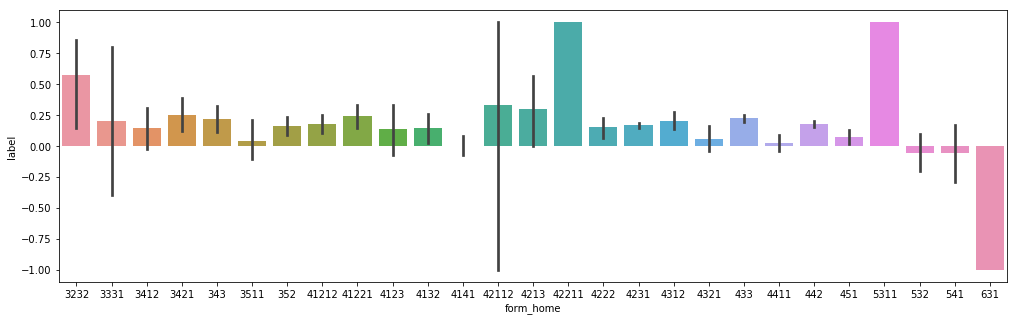

In [37]:
#Graphique des formations à domicile en fonction du label
plt.figure(figsize=(17,5))
sns.barplot(x='form_home', y='label',data=matchsTrainCopy)

Explication: Nous pouvons voir que suivant certaine formations le label a tendance a être plus élevé. C'est à dire que suivant une certaine formation, une équipe aura plus de chance de gagner un match

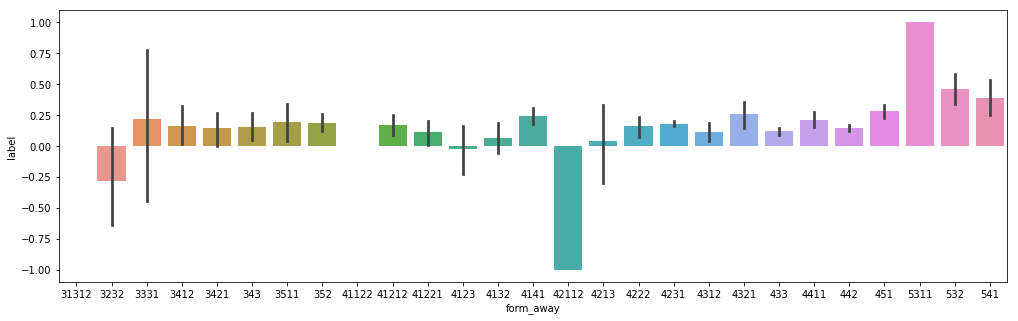

In [38]:
#Graphique des formations à l'extérieur en fonction du label
plt.figure(figsize=(17,5))
sns.barplot(x='form_away', y='label',data=matchsTrainCopy)

## Ajout des notes générales des joueurs

Pour ajouter les notes des joueurs, nous allons créer un dictionnaire avec comme clé un tuple avec l'api id et la date et comme valeur sa note générale ( En effet, la note d'un joueur varie en fonction du temps et un même joueur a donc plusieurs notes dans la table Players Attributes

In [39]:
def create_player_overall_dict(player_attr):
    ply_attr = player_attr[['player_api_id', 'overall_rating', 'date']]
    ply_attr['date'] = ply_attr['date'].apply(lambda x: x.split('-')[0]) # on retient seulement l'année
    ply_attr = ply_attr.groupby([ply_attr['player_api_id'], ply_attr['date']]).mean()

    return ply_attr.to_dict()['overall_rating']

ply_attr_overall_dict = create_player_overall_dict(player_attr)

Dans la table Players Attributs, il est possible qu'un joueur n'ai pas une note à une certaine date. Ce qui va provoquer un crash lorsqu'on voudra acceder à cette clé là (id,date)

In [40]:
def dict_key_checker(attr_dict, api_id, date):
    if(api_id is np.nan):# si l'api id est nulle nous renvoyons un Nan
        return np.nan
    try:
        res = attr_dict[(api_id, str(date))]
    except KeyError:
        date = int(date)
        dates = [int(k[1]) for k in attr_dict if k[0] == api_id]
        if not dates:  # si l'api id n'est pas présente dans le dictionnaire
            return 0
        res = attr_dict[(api_id, str(min(dates, key=lambda key: abs(key-date))))] # si la date n'est pas présente , 
        #on prend la date la plus proche
    return res

In [45]:
for i in range(1, 12):
    matchsTrainCopy['home_player_overall_'+str(i)] = matchsTrainCopy.apply(
        lambda x: dict_key_checker(ply_attr_overall_dict, x['home_player_'+str(i)], x['date'].split('-')[0])/99, axis=1)
    matchsTrainCopy['away_player_overall_'+str(i)] = matchsTrainCopy.apply(
        lambda x: dict_key_checker(ply_attr_overall_dict, x['away_player_'+str(i)], x['date'].split('-')[0])/99, axis=1)


Nous divisons la note par 99 car la note générale est une note entre 0 et 99. Ca nous permettera déjà de normaliser la note et se retrouver avec une valeur entre 0 et 1

In [ ]:
matchsTrainCopy.head()

In [ ]:
matchsTrainCopy.corrwith(matchsTrainCopy['label']).sort_values(ascending=False)[1:]

## Ajout du potentiel des joueurs

Nous recommencons la meme manipulation pour ajouter le potentiel des joueurs

In [ ]:
def create_player_pot_dict(player_attr):
    ply_attr = player_attr[['player_api_id', 'potential', 'date']]
    ply_attr['date'] = ply_attr['date'].apply(lambda x: x.split('-')[0])
    ply_attr = ply_attr.groupby([ply_attr['player_api_id'], ply_attr['date']]).mean()

    return ply_attr.to_dict()['potential']

ply_attr_pot_dict = create_player_pot_dict(player_attr)

for i in range(1, 12):
    matchsTrainCopy['home_player_potential_'+str(i)] = matchsTrainCopy.apply(lambda x: 
        dict_key_checker(ply_attr_pot_dict, x['home_player_'+str(i)], x['date'].split('-')[0])/99, axis=1)
    matchsTrainCopy['away_player_potential_'+str(i)] = matchsTrainCopy.apply(lambda x: 
        dict_key_checker(ply_attr_pot_dict, x['away_player_'+str(i)], x['date'].split('-')[0])/99, axis=1)

In [ ]:
matchsTrainCopy.corrwith(matchsTrainCopy['label']).sort_values(ascending=False)[1:]

## Ajout des attributs defensePressure et le buildUpPlayPassing 

Nous recommencons la meme manipulation pour ajouter les attributs defensePressure et le buildUpPlayPassing

In [ ]:
def create_team_attr_dict(teams_attr, key):
    tms_attr = teams_attr[['team_api_id', 'date','defencePressure', 'buildUpPlayPassing']]
    tms_attr['date'] = tms_attr['date'].apply(lambda x: x.split('-')[0])
    tms_attr = tms_attr.groupby([tms_attr['team_api_id'], tms_attr['date']]).mean()
    return tms_attr.to_dict()[key]

teams_buildUp_dict = create_team_attr_dict(team_attr, 'buildUpPlayPassing')
teams_def_press_dict = create_team_attr_dict(team_attr, 'defencePressure')

matchsTrainCopy['home_build_up'] = matchsTrainCopy.apply(lambda x: 
        dict_key_checker(teams_buildUp_dict, x['home_team_api_id'], x['date'].split('-')[0])/99, axis=1)
matchsTrainCopy['away_build_up'] = matchsTrainCopy.apply(lambda x: 
        dict_key_checker(teams_buildUp_dict, x['away_team_api_id'], x['date'].split('-')[0])/99, axis=1)
matchsTrainCopy['home_def_press'] = matchsTrainCopy.apply(lambda x: 
        dict_key_checker(teams_def_press_dict, x['home_team_api_id'], x['date'].split('-')[0])/99, axis=1)
matchsTrainCopy['away_def_press'] = matchsTrainCopy.apply(lambda x: 
        dict_key_checker(teams_def_press_dict, x['away_team_api_id'], x['date'].split('-')[0])/99, axis=1)

In [ ]:
matchsTrainCopy.corrwith(matchsTrainCopy['label']).sort_values(ascending=False)[1:]

## Exploitation des notes générales / potentiel des joueurs et de la formation

Une idée que l'on pourrait avoir pour réduire le nombre de colonnes du training set est, grace à la formation, de faire une moyenne des notes d'une équipe par ligne ( défense , milieu et attaque)  

In [ ]:
def get_nbr_players_by_lines(form):
    list_form = list(form)
    list_form = [int(x) for x in list_form]
    defenders = list_form[0] + 1  # le nombre de joueur sur la premiere ligne de la formation plus le gardien
    attackers = list_form[-1] # le nombre de joueur sur la derniere ligne de la formation
    midfielders = sum(list_form[1:-1]) # la somme des joueurs entre les ligne de defense et d'attaque
    return defenders, midfielders, attackers

In [ ]:
for index, row in matchsTrainCopy.iterrows():
    nbr_def_home, nbr_mid_home, nbr_att_home = get_nbr_players_by_lines(row['form_home'])
    nbr_def_away, nbr_mid_away, nbr_att_away = get_nbr_players_by_lines(row['form_away'])

    # Overall
    matchsTrainCopy.loc[index, 'home_def_overall'] = row.loc[[
                'home_player_overall_' + str(i) for i in range(1, nbr_def_home+1)]].mean()
    matchsTrainCopy.loc[index, 'home_mid_overall'] = row.loc[[
                'home_player_overall_' + str(i) for i in range(nbr_def_home+1, nbr_def_home + nbr_mid_home+1)]].mean()
    matchsTrainCopy.loc[index, 'home_att_overall'] = row.loc[[
                'home_player_overall_' + str(i) for i in range(nbr_def_home + nbr_mid_home+1, 12)]].mean()

    matchsTrainCopy.loc[index, 'away_def_overall'] = row.loc[[
                'away_player_overall_' + str(i) for i in range(1, nbr_def_away+1)]].mean()
    matchsTrainCopy.loc[index, 'away_mid_overall'] = row.loc[[
                'away_player_overall_' + str(i) for i in range(nbr_def_away+1, nbr_def_away + nbr_mid_away+1)]].mean()
    matchsTrainCopy.loc[index, 'away_att_overall'] = row.loc[[
                'away_player_overall_' + str(i) for i in range(nbr_def_away + nbr_mid_away+1, 12)]].mean()


    # Potential
    matchsTrainCopy.loc[index, 'home_def_pot'] = row.loc[[
        'home_player_potential_' + str(i) for i in range(1, nbr_def_home+1)]].mean()
    matchsTrainCopy.loc[index, 'home_mid_pot'] = row.loc[[
        'home_player_potential_' + str(i) for i in range(nbr_def_home+1, nbr_def_home + nbr_mid_home+1)]].mean()
    matchsTrainCopy.loc[index, 'home_att_pot'] = row.loc[[
        'home_player_potential_' + str(i) for i in range(nbr_def_home + nbr_mid_home+1, 12)]].mean()

    matchsTrainCopy.loc[index, 'away_def_pot'] = row.loc[[
        'away_player_potential_' + str(i) for i in range(1, nbr_def_away+1)]].mean()
    matchsTrainCopy.loc[index, 'away_mid_pot'] = row.loc[[
        'away_player_potential_' + str(i) for i in range(nbr_def_away+1, nbr_def_away + nbr_mid_away+1)]].mean()
    matchsTrainCopy.loc[index, 'away_att_pot'] = row.loc[[
        'away_player_potential_' + str(i) for i in range(nbr_def_away + nbr_mid_away+1, 12)]].mean()


In [ ]:
#On supprime les colonnes qui ne nous serviront plus
matchsTrainCopy.drop(matchsTrainCopy.select(lambda col: col.startswith('home_player'), axis=1), axis=1, inplace=True)
matchsTrainCopy.drop(matchsTrainCopy.select(lambda col: col.startswith('away_player'), axis=1), axis=1, inplace=True)

In [ ]:
matchsTrainCopy.info()

In [ ]:
matchsTrainCopy.corrwith(matchsTrainCopy['label']).sort_values(ascending=False)[1:]

Nous pouvons voir que nous avons augmenté le score des correlations des notes géneraux de joueurs ainsi que leur potentiel en prennant les joueurs par ligne de champs!

## Rapport entre les attributs de l'équipe à domicile et à l'extérieur

L'idée ici sera d'effectuer un rapport (une difference) entre les colonnes des differents attributs des équipes domicile et extérieur. En effet cette difference, si elle est positif représentera une correlation positive avec le label , si négative une correlation négative

In [ ]:
#Difference entre les 2 defenses , les 2 milieux et les 2 attaques
matchsTrainCopy['diff_def_overall'] = matchsTrainCopy['home_def_overall'] - matchsTrainCopy['away_def_overall']
matchsTrainCopy['diff_mid_overall'] = matchsTrainCopy['home_mid_overall'] - matchsTrainCopy['away_mid_overall']
matchsTrainCopy['diff_att_overall'] = matchsTrainCopy['home_att_overall'] - matchsTrainCopy['away_att_overall']

#Difference entre les ligne à confrontation direct c'est à dire l'attaque de l'équipe à domicile contre la defence 
# de l'équipe à l'extérieur ainsi que la defence domicile contre l'attaque extérieur
matchsTrainCopy['diff_att_home_def_away'] = matchsTrainCopy['home_att_overall'] - matchsTrainCopy['away_def_overall']
matchsTrainCopy['diff_def_home_att_away'] = matchsTrainCopy['home_def_overall'] - matchsTrainCopy['away_att_overall']

#Idem pour le potentiel
matchsTrainCopy['diff_def_pot'] = matchsTrainCopy['home_def_pot'] - matchsTrainCopy['away_def_pot']
matchsTrainCopy['diff_mid_pot'] = matchsTrainCopy['home_mid_pot'] - matchsTrainCopy['away_mid_pot']
matchsTrainCopy['diff_att_pot'] = matchsTrainCopy['home_att_pot'] - matchsTrainCopy['away_att_pot']

#Difference entre les 2 attributs d'equipe defensePressure et le buildUpPlayPassing
matchsTrainCopy['diff_build_up'] = matchsTrainCopy['home_build_up'] - matchsTrainCopy['away_build_up']
matchsTrainCopy['diff_def_press'] = matchsTrainCopy['home_def_press'] - matchsTrainCopy['away_def_press']


In [ ]:
matchsTrainCopy.info()

In [ ]:
matchsTrainCopy.info()

In [ ]:
matchsTrainCopy.corrwith(matchsTrainCopy['label']).sort_values(ascending=False)[1:]

Avec SelectKBest

In [ ]:
dfCopy = matchsTrainCopy.select_dtypes(['float64','int64'])

X = dfCopy.drop(dfCopy[['label']], axis=1)  
y = dfCopy['label']  
#On applique SelectKBest pour extraire les 10 meilleurs features
skb = SelectKBest(score_func=f_classif, k=10)
fit = skb.fit(X,y)
scores = pd.DataFrame(fit.scores_) #On recupere le score
columns = pd.DataFrame(X.columns) # On recupere le nom des colonnes
#On concatene les 2 dataframes pour visualiser 
result = pd.concat([columns,scores],axis=1)
result.columns = ['Features','Score']
print(result.nlargest(10,'Score')) 

Nous allons garder les colonnes représentants la difference des notes générales , des potentiels et des attributs d'équipe et supprimer les diminuendes et les diminuteurs.

In [ ]:
matchsTrainCopy = matchsTrainCopy.drop(['home_build_up','away_build_up','home_def_press','away_def_press','home_def_overall',
                                     'home_mid_overall','home_att_overall','away_def_overall','away_mid_overall',
                                     'away_att_overall','home_def_pot','home_mid_pot','home_att_pot','away_def_pot',
                                     'away_mid_pot','away_att_pot'], axis=1)

In [ ]:
plt.figure(figsize=(20,7))
sns.heatmap(matchsTrainCopy.corr(),annot=True,cmap='coolwarm', linewidths=1)

HeatMap des valeurs numériques qu'on gardera comme features pour nos modeles

### Idées de transformation des données qui n'ont pas abouties
- Prendre des données statistiques à partir du training set comme le nombre totals des buts inscrits par une equipe , le nombre de victoire à domicile , le taux de victoire d'une équipe ou le aux de victoire d'une équipe à domicile dans les confrontations direct avec l'équipe extérieur => ces données repésentaient un risque d'overfitting c'est pourquoi cette idée n'a pas aboutie
- PCA : vu le nombre réduit de nos features , le PCA n'a pas donnée de résultats concluants

In [ ]:
#Copie de la colonne label et suppression de celle ci dans le training set
label = matchsTrainCopy[['label']]
matchsTrainCopy = matchsTrainCopy.drop(['label'], axis=1)

## Data Normalization


Dans un premier temps, on écrit et exécute tout les imports qu'on a besoin pour nettoyer les données

In [ ]:
from sklearn.base import TransformerMixin  # gives fit_transform method for free
from sklearn.preprocessing import LabelBinarizer, OneHotEncoder, MultiLabelBinarizer
from sklearn.preprocessing import Imputer, OrdinalEncoder
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline


class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[self.attribute_names].values


class MyLabelBinarizer(TransformerMixin):
    def __init__(self, *args, **kwargs):
        self.encoder = MultiLabelBinarizer(*args, **kwargs)

    def fit(self, x, y=0):
        self.encoder.fit(x)
        return self

    def transform(self, x, y=0):
        return self.encoder.transform(x)

On a crée une classe Data_cleaning qui s'occupe de nettoyer les données en une fois.

Afin de cleaner les datas, nous avons utilisé un pipeline.
Pour utiliser ce pipeline, on a séparé les datas en 2 catégories :
    1. les variables numériques ( de type float64 ou int64 )
    2. les variables catégorielles ( la saison dans ce cas-ci )
    
- Les variables numériques
    
    1. Quelle méthode choisir entre MinMaxScaler() et StandarScaler() pour la mise à l'échelle des données ?   

- les variables catégorielles

    On applique un multiLabelBinazer pour pouvoir utiliser les variables catégorielles dans le modèle. (Le multiBinazer fait un OneHotEncoder pour chaque variables catégorielles)


### MinMaxScaler ou StandardScaler

Un choix important de mise à l'échelle est de choisir entre MinMaxScaler et StandardScaler. Nous avons trouvé une explication pour savoir  quelle méthode favoriser. Voici la source. 

Standardscaler:

1.In Standardscaler, it assumes that data has normally distributed features and will scale them to zero mean and 1 standard deviation.

2.All the features will be of the same scale after applying the scaler.

Minmaxscaler :

1.Minmaxscaler  shrinks the data within the range of -1 to 1(if there are negative values)

2. This responds well if standard deviation is small and  is used when distribution is not Gaussian.This scaler is sensitive to outliers.


source : https://intellipaat.com/community/9629/difference-between-standard-scaler-and-minmaxscaler

Nous allons donc ploter les différentes variables numériques.

Mais dans un premier temps, nous prenons un dataframe sur lequel on a appliqué l'engineering. Et on sélectionne les colonnes contenant des données de types réels mise sous forme de variables continues. Toutes les variables pouvant contenir des outliers.



In [ ]:
import pandas as pd
from sklearn.pipeline import FeatureUnion

matchsTrainCleaning = matchsTrainCopy

matchsTrainCleaning.drop(columns=['index'],inplace=True)

matchsTrainCleaning.head()

#On peut voir que les variables continues sont à partir de la colonne 7

In [ ]:
#Les variables continues sont les colonnes 7 à 16
matchsTrainNumVariables = matchsTrainCleaning.iloc[:,10:19]

colLabels = matchsTrainNumVariables.columns

matchsTrainNumVariables.head()

matchsTrainNumVariables.describe()

# Description de la variance

## Data Visualization

### Boxplot pour visualiser si présences d'outliers

Les outliers sont indiqués sur le graphe par des losanges noirs.


In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns

## PLOTING BOXPLOT
fig3,ax3 = plt.subplots(figsize=(50,30))
ax = sns.boxplot(data=matchsTrainNumVariables,fliersize=20)
ax.tick_params(labelsize=25)
plt.show()

### Distribution des différents variables via histogrammes

In [ ]:

for i in range(0,matchsTrainNumVariables.shape[1]):
    plt.figure(i)
    sns.distplot(matchsTrainNumVariables.iloc[:,i])
    plt.show()

#### Conclusion choix du Scaler

Etant donné que certaines distributions de variables continues ne suivent pas totalement une distribution Normale ( Gaussienne) et qu'on a vu sur le graphes des boxplots, des présences d'outliers, nous avons choisit le MinMaxScaler comme méthode de mise à l'échelle. La déviation standard des variables est aussi petites (voir tableau Out[5] ) ce qui vient appuyer le choix du MinMaxScaler.


On fait donc via un pipeline la normalisation ainsi que l'application d'un OneHotEncoder via MultiLabelBinazer.

In [ ]:
class Data_Cleaning:
    def __init__(self, matchs):
        self.matchs = matchs

    def run(self):

        # Récupérer toutes les features du type float64
        numerical_data = self.matchs.select_dtypes(["float64", 'int64'])
        num_attribs = list(numerical_data)
        # Changer le type des saisons d'objets à categorique

        # ,'home_team_name','away_team_name','home_form','away_form']
        categorical_attrib = ['season']
        self.matchs[categorical_attrib] = self.matchs[categorical_attrib].apply(
            lambda x: x.astype('category'))

        # Utilisation de pipeline pour clean les data

        num_pipeline = Pipeline([
            ('selector', DataFrameSelector(num_attribs)),
            ('min_max_scaler', StandardScaler()),
        ])

        categorical_pipeline = Pipeline([
            ('selector', DataFrameSelector(categorical_attrib)),
            ('label_binazer', MyLabelBinarizer()),
        ])

        from sklearn.pipeline import FeatureUnion
        full_pipeline = FeatureUnion(transformer_list=[
            ("num_pipeline", num_pipeline),
            ("categorical_pipeline", categorical_pipeline)
        ])

        # data are clean here
        match_cleaned = full_pipeline.fit_transform(self.matchs)
        return match_cleaned

    
matchsTrainCleaned = Data_Cleaning(matchsTrainCopy).run()

matchsTrainCleaned = pd.DataFrame(matchsTrainCleaned)

matchsTrainCleaned.head()